In [ ]:
import pandas as pd
from google.colab import files

# Upload file
uploaded = files.upload()

# Get the file name
filename = next(iter(uploaded))

# Try reading with 'ISO-8859-1' encoding (often works for such errors)
df = pd.read_csv(filename, encoding='ISO-8859-1')

# Check shape and first few rows
print("Rows:", df.shape[0], " | Columns:", df.shape[1])
df.head()


Saving cosmetic_products_true_recommendations_2500_rows_filled1.csv to cosmetic_products_true_recommendations_2500_rows_filled1.csv
Rows: 500  | Columns: 21


,age,gender,Skin Type Suitability,Current Products,Skin Concerns,Lifestyle Factors,Average Sleep Hours,Stress Level,Exercise Frequency,Daily Water Intake (liters),...,Time for Routine (minutes),Preferences,Product Name,Claimed Effects,Ingredients,Product Type,Description,Previous Professional Treatments,True Recommendation,Price
0,42,Female,Dry; Combination,Sunscreen,Redness,Moderate,46,Low,12,12,...,1630,Fragrance-Free,HydraBoost Gel,Hydration; Soothing,Aqua,Gel,Lightweight gel for deep hydration,NaN,False,499.0
1,20,Other,Oily; Combination,Moisturizer,Hyperpigmentation,Moderate,79,Moderate,12,23,...,3145,Oil-Free,ClearSkin Serum,Acne Control; Oil Control,Salicylic Acid; Niacinamide,Serum,Targets acne and reduces oil,NaN,False,799.0
2,46,Female,All,Face Wash,"Oily Skin, Uneven Tone",Moderate,13,High,12,12,...,1630,Organic,Radiance Cream,Brightening; Anti-Pigmentation,Vitamin C; Hyaluronic Acid,Cream,Brightens skin and reduces pigmentation,NaN,False,999.0
3,38,Male,Sensitive,Serum,Aging,Sedentary,46,Low,12,12,...,1630,Fragrance-Free,CalmEssence Lotion,Soothing; Redness Relief,Chamomile; Aloe Vera,Lotion,Soothes sensitive skin,NaN,False,599.0
4,19,Female,Dry; All,Toner,"Dryness, Fine Lines",Moderate,13,Moderate,0,01,...,015,Paraben-Free,YouthRenew Night Cream,Anti-Aging; Firming,Retinol; Peptides,Cream,Reduces wrinkles and firms skin,NaN,False,1299.0


Saving cosmetic_products_true_recommendations_2500_rows_filled1.csv to cosmetic_products_true_recommendations_2500_rows_filled1 (1).csv
Rows: 500 | Columns: 21

Column Data Types:
 age                                   int64
gender                               object
Skin Type Suitability                object
Current Products                     object
Skin Concerns                        object
Lifestyle Factors                    object
Average Sleep Hours                  object
Stress Level                         object
Exercise Frequency                   object
Daily Water Intake (liters)          object
Environment Factors                  object
Time for Routine (minutes)           object
Preferences                          object
Product Name                         object
Claimed Effects                      object
Ingredients                          object
Product Type                         object
Description                          object
Previous Professional Treat

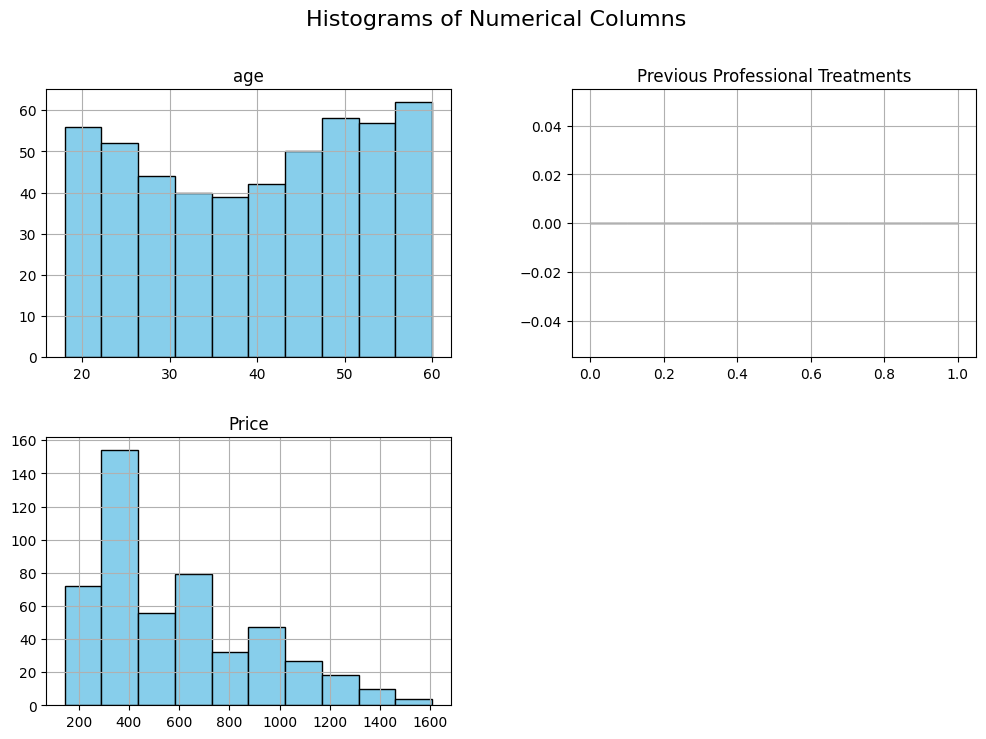

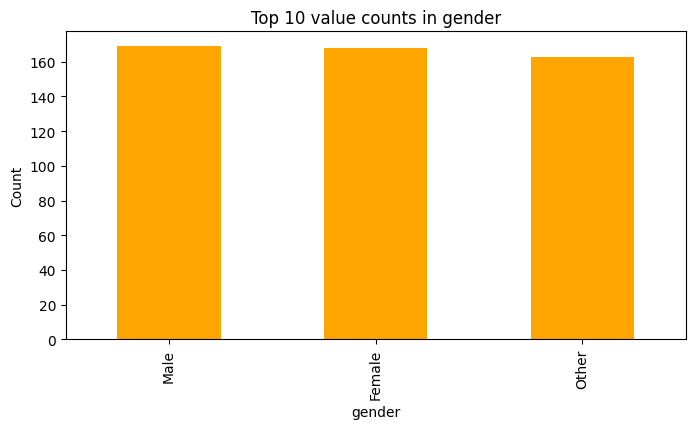

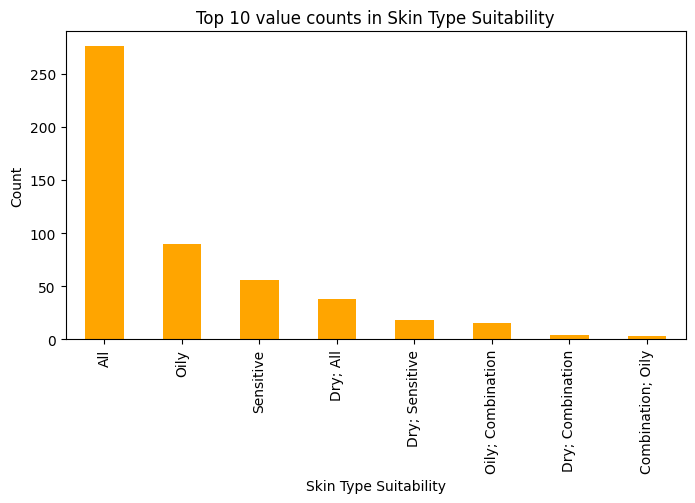

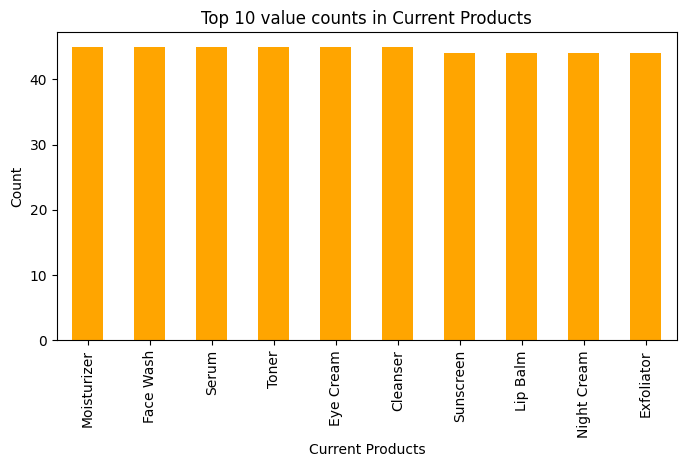

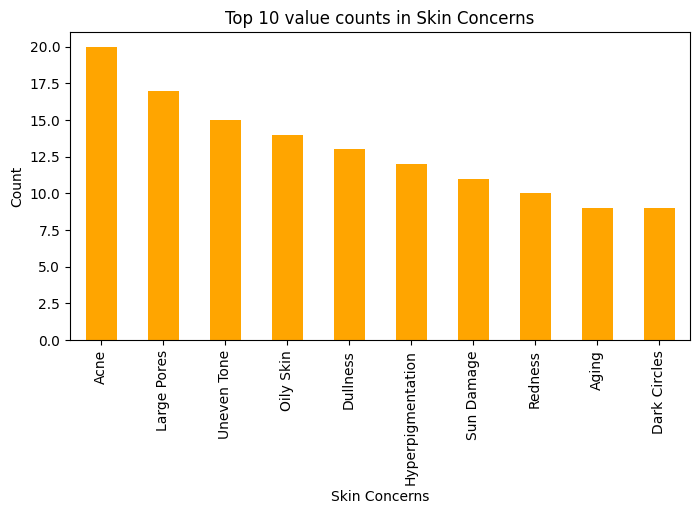

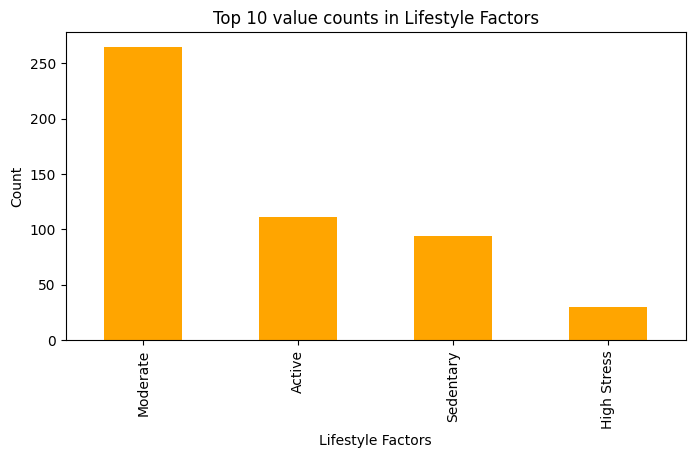

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


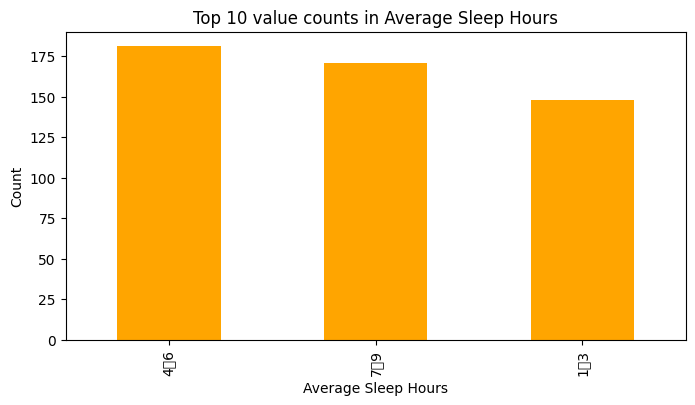

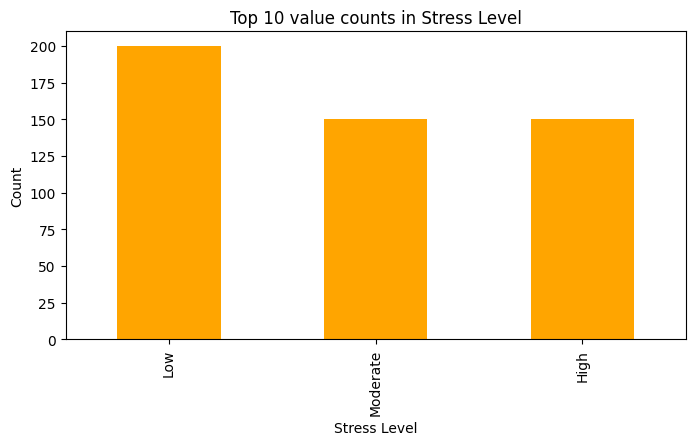

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


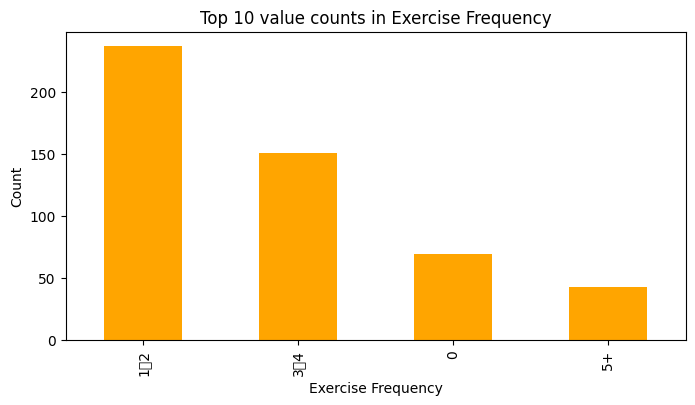

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


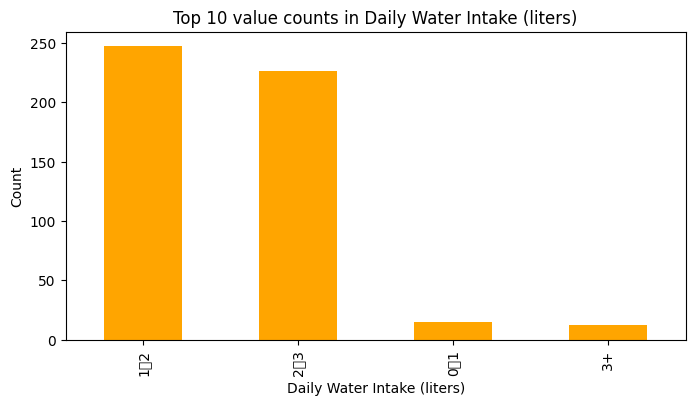

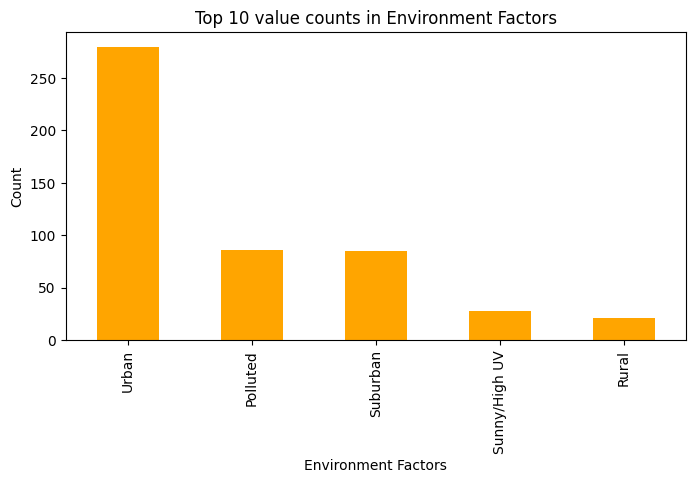

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


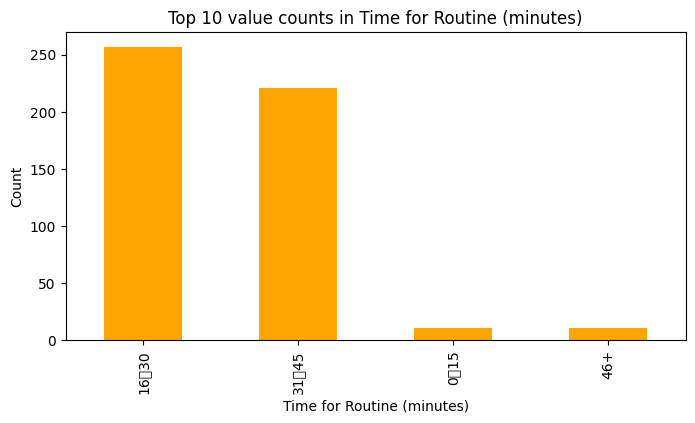

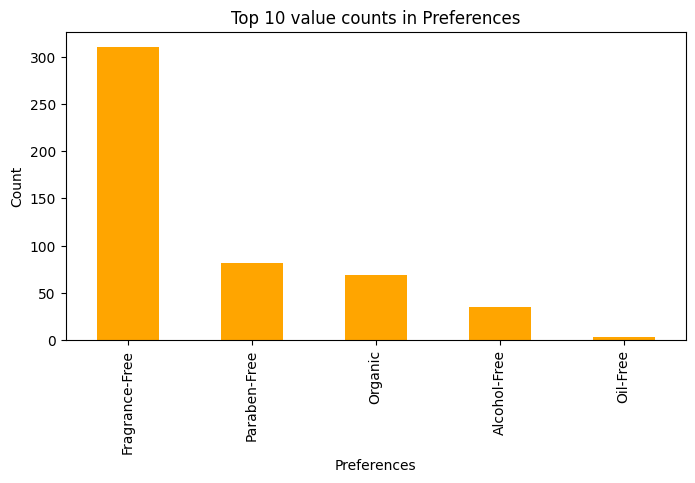

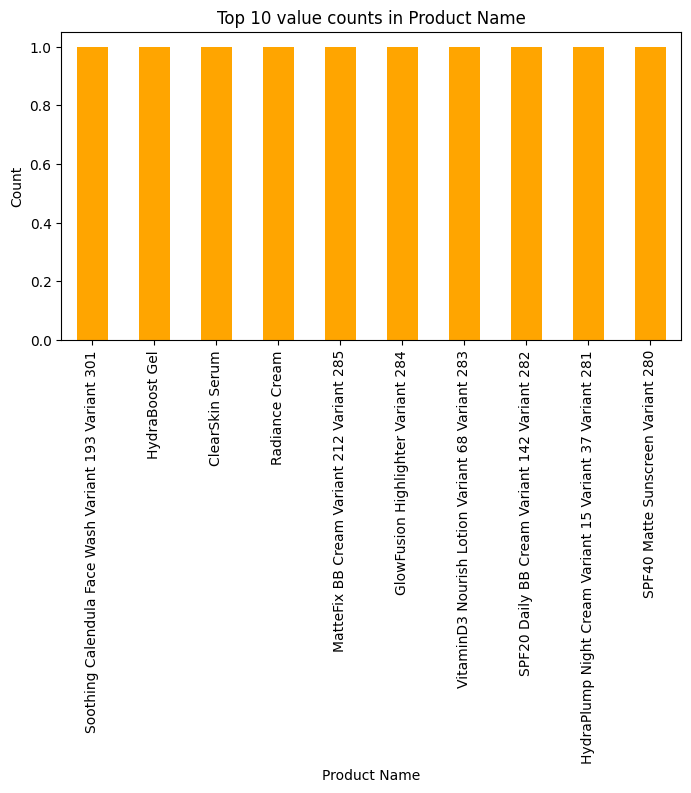

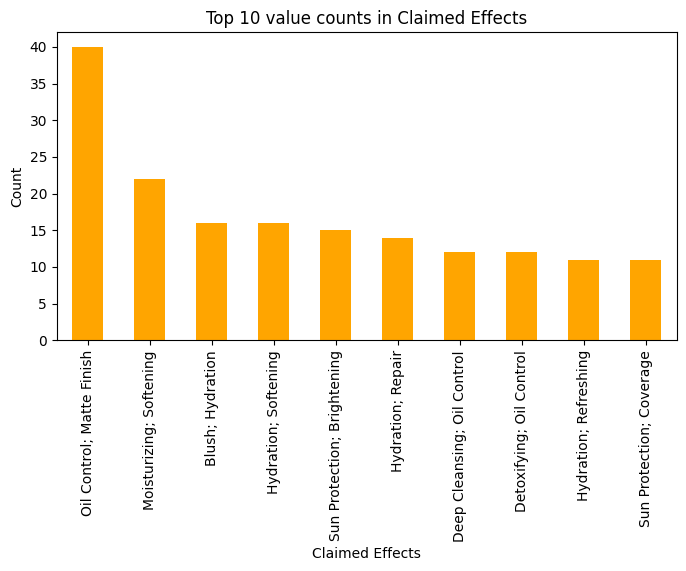

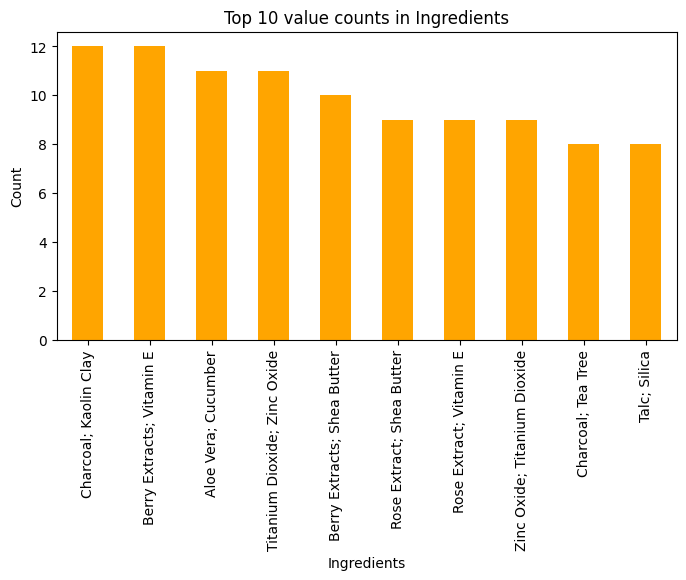

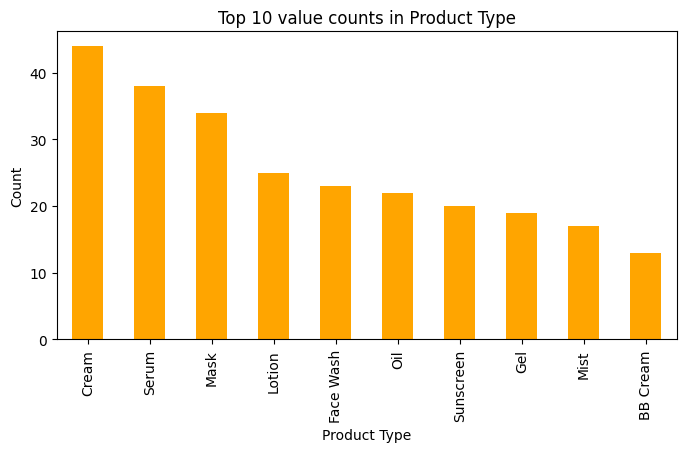

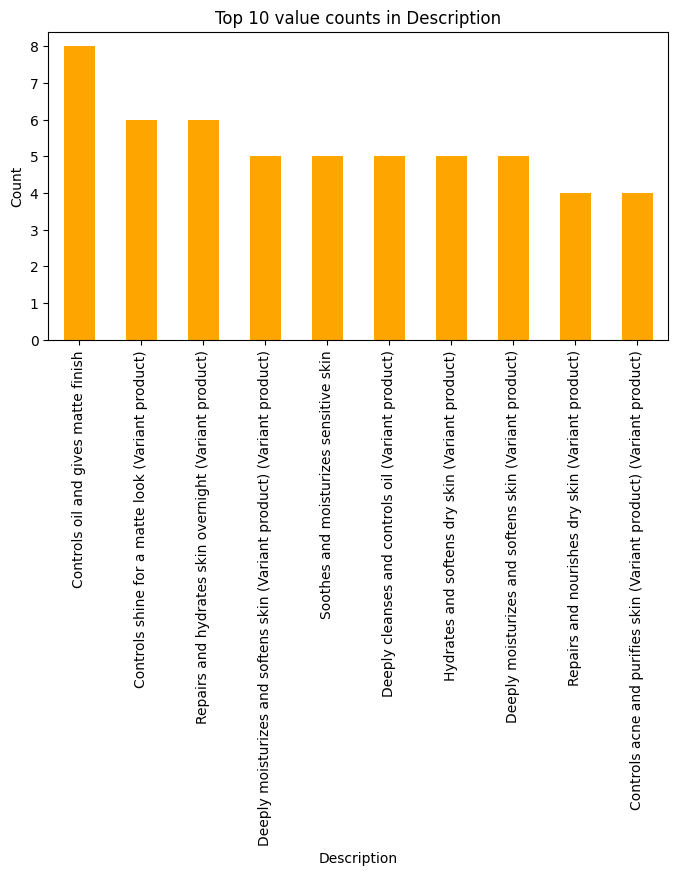

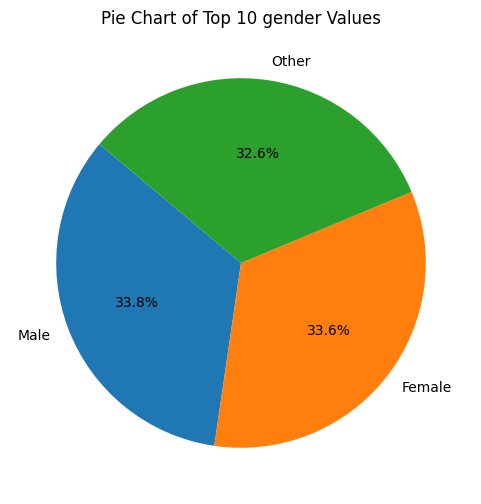

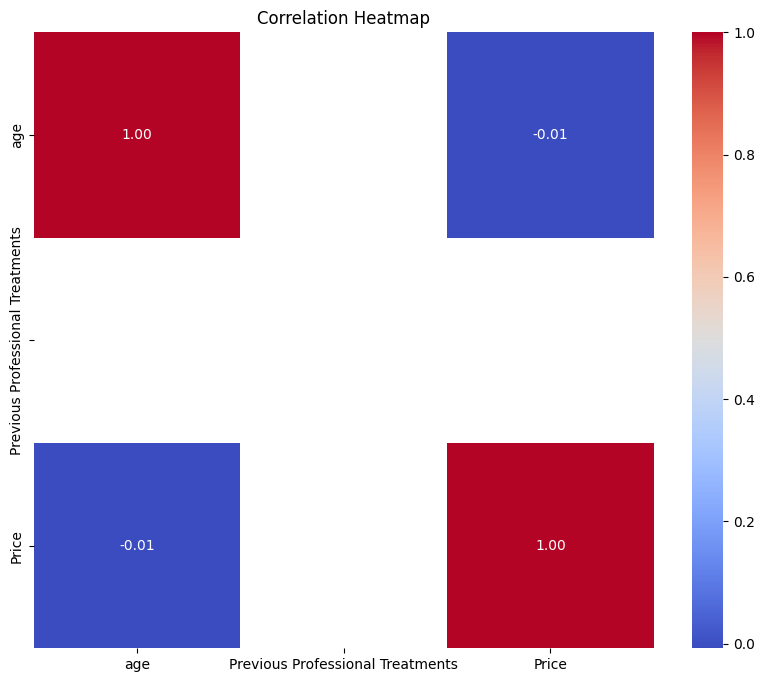

In [ ]:
# Step 1: Import Libraries
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Upload CSV file
uploaded = files.upload()
# Specify the correct encoding
df = pd.read_csv(next(iter(uploaded)), encoding='ISO-8859-1')

# Step 3: Basic Overview
print("Rows:", df.shape[0], "| Columns:", df.shape[1])
print("\nColumn Data Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())
print("\nSummary Statistics:\n", df.describe())

# Step 4: Check Missing Values
print("\nMissing Values in Each Column:\n", df.isnull().sum())

# Step 5: Check Duplicates
print("\nNumber of Duplicate Rows:", df.duplicated().sum())

# Step 6: Visualizations

# 6a: Histogram for all numerical columns
df.hist(figsize=(12,8), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.show()

# 6b: Bar chart for categorical columns (top 10 frequent values)
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().head(10).plot(kind='bar', color='orange')
    plt.title(f'Top 10 value counts in {col}')
    plt.ylabel('Count')
    plt.show()

# 6c: Pie chart for first categorical column (if exists)
if len(categorical_cols) > 0:
    col = categorical_cols[0]
    plt.figure(figsize=(6,6))
    df[col].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of Top 10 {col} Values')
    plt.ylabel('')
    plt.show()

# 6d: Correlation Heatmap (for numerical columns)
plt.figure(figsize=(10,8))
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load your dataset
file_path = 'cosmetic_products_true_recommendations_2500_rows_filled1.csv'
df = pd.read_csv(file_path, encoding='latin1')

# Fill missing values in relevant text columns and combine
features = df[['Product Name', 'Ingredients', 'Product Type', 'Claimed Effects',
               'Skin Type Suitability', 'Preferences', 'Description']].fillna('')
features_combined = features.apply(lambda x: ' '.join(x.astype(str)), axis=1)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(features_combined)

# Helper function for input choice
def choose_option(prompt, options):
    print(f"{prompt}")
    for i, option in enumerate(options, 1):
        print(f"{i}. {option}")
    while True:
        choice = input("Enter the number of your choice: ")
        if choice.isdigit() and 1 <= int(choice) <= len(options):
            return options[int(choice) - 1]
        else:
            print("Invalid choice. Please try again.")

# User profile inputs aligned to dataset columns
def get_user_profile():
    profile = {}
    profile['Name'] = input("Enter your name: ")
    profile['Age'] = input("Enter your age: ")
    profile['Gender'] = choose_option("Select your gender:", ['Female', 'Male', 'Other'])
    profile['Skin Type Suitability'] = choose_option(
        "Select your skin type suitability:",
        ['Dry', 'Oily', 'Combination', 'Sensitive', 'All']
    )
    profile['Current Products'] = input("List skincare products you use currently (comma-separated): ")
    profile['Skin Concerns'] = input("List your main skin concerns (comma-separated): ")
    profile['Lifestyle Factors'] = choose_option(
        "Select your lifestyle factors:",
        ['Sedentary', 'Moderate', 'Active', 'High Stress']
    )
    profile['Average Sleep Hours'] = choose_option(
        "Select your average sleep hours per night:",
        ['<1', '1-2', '2-3', '3-4', '4-6', '6-8', '>8']
    )
    profile['Stress Level'] = choose_option("Select your stress level:", ['Low', 'Moderate', 'High'])
    profile['Exercise Frequency'] = choose_option(
        "Select your exercise frequency:",
        ['0', '1-2', '3-4', '5+']
    )
    profile['Daily Water Intake'] = choose_option(
        "Select your daily water intake (liters):",
        ['<1', '1-2', '2-3', '3+']
    )
    profile['Environment Factors'] = choose_option(
        "Select your environment factors:",
        ['Urban', 'Suburban', 'Rural', 'Polluted', 'Sunny/High UV']
    )
    profile['Time for Routine'] = choose_option(
        "Select your time for routine (minutes/day):",
        ['<15', '16-30', '31-45', '46-60', '>60']
    )
    profile['Preferences'] = choose_option(
        "Select product preference:",
        ['Fragrance-Free', 'Oil-Free', 'Organic', 'Paraben-Free', 'Sulfate-Free', 'None']
    )

    # For budget, use float input
    while True:
        try:
            profile['Monthly Budget'] = float(input("Enter your monthly budget for skincare products: "))
            break
        except ValueError:
            print("Invalid amount. Please enter a numeric value.")
    return profile

# Vectorize user profile for recommendation matching
def user_vectorize(user_profile):
    user_text = ' '.join([
        str(user_profile['Current Products']),
        str(user_profile['Skin Concerns']),
        str(user_profile['Lifestyle Factors']),
        str(user_profile['Skin Type Suitability']),
        str(user_profile['Environment Factors']),
        str(user_profile['Preferences'])
    ])
    return vectorizer.transform([user_text])

# Recommend top products within budget based on cosine similarity
def recommend_products(user_vec, budget, top_n=5):
    sim_scores = cosine_similarity(user_vec, tfidf_matrix)[0]
    budget_filtered_indices = df[df['Price'] <= budget].index.tolist()
    filtered_sim_scores = [(idx, sim_scores[idx]) for idx in budget_filtered_indices]
    filtered_sim_scores.sort(key=lambda x: x[1], reverse=True)
    top_indices = [idx for idx, score in filtered_sim_scores[:top_n]]
    return df.loc[top_indices][['Product Name', 'Description', 'Price']]

# Collect feedback on system for improvements
def collect_system_feedback():
    print("\nPlease provide your feedback about the recommendation system:")
    feedback_questions = [
        "How useful was the system?",
        "How would you rate the recommendation quality?",
        "How user-friendly was the system?"
    ]
    options = ['Excellent', 'Good', 'Average', 'Poor']
    feedback = {}
    for question in feedback_questions:
        feedback[question] = choose_option(question, options)
    return feedback

# Main program flow
if __name__ == "__main__":
    user_profile = get_user_profile()
    user_vec = user_vectorize(user_profile)
    recommendations = recommend_products(user_vec, user_profile['Monthly Budget'])

    print(f"\nPersonalized Skincare Recommendations for {user_profile['Name']}:")
    print(recommendations.to_string(index=False))

    feedback = collect_system_feedback()
    print("\nSystem Feedback Summary:")
    for question, response in feedback.items():
        print(f"- {question}: {response}")
    print("\nThank you for your support! Your feedback helps us improve the system. 😊")


Enter your name: divya
Enter your age: 20
Select your gender:
1. Female
2. Male
3. Other
Enter the number of your choice: 1
Select your skin type suitability:
1. Dry
2. Oily
3. Combination
4. Sensitive
5. All
Enter the number of your choice: 1
List skincare products you use currently (comma-separated): sunscream
List your main skin concerns (comma-separated): dryness
Select your lifestyle factors:
1. Sedentary
2. Moderate
3. Active
4. High Stress
Enter the number of your choice: 1
Select your average sleep hours per night:
1. <1
2. 1-2
3. 2-3
4. 3-4
5. 4-6
6. 6-8
7. >8
Enter the number of your choice: 5
Select your stress level:
1. Low
2. Moderate
3. High
Enter the number of your choice: 1
Select your exercise frequency:
1. 0
2. 1-2
3. 3-4
4. 5+
Enter the number of your choice: 1
Select your daily water intake (liters):
1. <1
2. 1-2
3. 2-3
4. 3+
Enter the number of your choice: 4
Select your environment factors:
1. Urban
2. Suburban
3. Rural
4. Polluted
5. Sunny/High UV
Enter the numbe

In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

file_path = 'cosmetic_products_true_recommendations_2500_rows_filled1.csv'
data = pd.read_csv(file_path, encoding='latin1')

# Define structured features and target
structured_features = ['age', 'gender', 'Skin Type Suitability', 'Skin Concerns', 'Lifestyle Factors',
                       'Stress Level', 'Exercise Frequency', 'Environment Factors', 'Preferences']
text_features = ['Product Name', 'Ingredients', 'Description']  # text columns
target = 'True Recommendation'

# Drop rows with missing values in features or target
data = data.dropna(subset=structured_features + text_features + [target])

# Encode categorical structured features
categorical_cols = ['gender', 'Skin Type Suitability', 'Skin Concerns', 'Lifestyle Factors',
                    'Stress Level', 'Exercise Frequency', 'Environment Factors', 'Preferences']
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col].astype(str))

# Encode target
if data[target].dtype == 'object':
    data[target] = data[target].map({'True': 1, 'False': 0})

# Scale numeric features
scaler = StandardScaler()
data[['age']] = scaler.fit_transform(data[['age']])

# Combine text features using TF-IDF
# Merge text columns into a single string per row
data['text_combined'] = data[text_features].apply(lambda x: ' '.join(x.astype(str)), axis=1)

# TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
tfidf_matrix = tfidf.fit_transform(data['text_combined'])

# Compute cosine similarity among all products (optional for recommendation)
cos_sim = cosine_similarity(tfidf_matrix)

# Prepare input (X) and target (y)
X_structured = data[structured_features].values  # structured numeric features
X_text = tfidf_matrix.toarray()  # TF-IDF text features as array

# Combine structured and text features
X = np.hstack((X_structured, X_text))
y = data[target].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest with GridSearchCV
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [6, 8],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Recommendation for a single product using cosine similarity
def recommend_products(product_index, top_n=5):
    similarity_scores = cos_sim[product_index]
    recommended_indices = similarity_scores.argsort()[::-1][1:top_n+1]  # exclude self
    return data.iloc[recommended_indices][['Product Name', 'True Recommendation']]

# Example: recommend products similar to the first row
print("\nRecommended Products for the first product:")
print(recommend_products(0, top_n=5))


Best Hyperparameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}
Model Accuracy: 0.9500
Classification Report:
              precision    recall  f1-score   support

       False       0.94      1.00      0.97        72
        True       1.00      0.82      0.90        28

    accuracy                           0.95       100
   macro avg       0.97      0.91      0.93       100
weighted avg       0.95      0.95      0.95       100

Confusion Matrix:
[[72  0]
 [ 5 23]]

Recommended Products for the first product:
                           Product Name  True Recommendation
462          HydraBoost Gel Variant 264                False
105                      SPF50 Aqua Gel                 True
255           SPF50 Aqua Gel Variant 57                 True
187              HydraBoost Water Cream                 True
331  HydraBoost Water Cream Variant 133                 True
